In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))


In [4]:
df.head(5)

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [5]:
df.shape

(81430, 61)

In [6]:
df.dtypes

caseId              object
docketId            object
caseIssuesId        object
voteId              object
dateDecision        object
                    ...   
opinion            float64
direction          float64
majority           float64
firstAgreement     float64
secondAgreement    float64
Length: 61, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81430 entries, 0 to 81429
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   caseId                    81430 non-null  object 
 1   docketId                  81430 non-null  object 
 2   caseIssuesId              81430 non-null  object 
 3   voteId                    81430 non-null  object 
 4   dateDecision              81430 non-null  object 
 5   decisionType              81430 non-null  int64  
 6   usCite                    77744 non-null  object 
 7   sctCite                   81430 non-null  object 
 8   ledCite                   81422 non-null  object 
 9   lexisCite                 81430 non-null  object 
 10  term                      81430 non-null  int64  
 11  naturalCourt              81430 non-null  int64  
 12  chief                     81430 non-null  object 
 13  docket                    81358 non-null  object 
 14  caseNa

In [8]:
df.describe()

,decisionType,term,naturalCourt,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,...,splitVote,majVotes,minVotes,justice,vote,opinion,direction,majority,firstAgreement,secondAgreement
count,81430.000000,81430.000000,81430.000000,81430.000000,16599.000000,81421.000000,22742.000000,81421.000000,22179.000000,5934.000000,...,81430.0,81430.000000,81430.000000,81430.000000,79409.000000,79400.000000,76781.000000,78473.000000,10394.000000,1596.000000
mean,1.656711,1979.160543,1512.449097,140.043559,29.316947,123.308901,29.169862,1.354135,72.973128,29.539771,...,1.0,7.106349,1.627631,96.899754,1.511491,1.247834,1.526823,1.817453,86.348085,22.328321
std,1.577497,19.460784,116.503651,105.953816,18.325808,103.768449,18.009914,1.243459,36.102345,17.033514,...,0.0,1.568813,1.532229,9.645996,1.128057,0.450739,0.499283,0.386297,32.396259,42.278906
min,1.000000,1946.000000,1301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,3.000000,0.000000,78.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1964.000000,1408.000000,28.000000,12.000000,28.000000,13.000000,1.000000,44.000000,13.000000,...,1.0,6.000000,0.000000,91.000000,1.000000,1.000000,1.000000,2.000000,86.000000,0.000000
50%,1.000000,1978.000000,1506.000000,126.000000,30.000000,116.000000,29.000000,1.000000,69.000000,30.000000,...,1.0,7.000000,1.000000,98.000000,1.000000,1.000000,2.000000,2.000000,98.000000,0.000000
75%,1.000000,1993.000000,1606.000000,211.000000,45.000000,195.000000,45.000000,1.000000,117.000000,42.000000,...,1.0,9.000000,3.000000,104.000000,2.000000,1.000000,2.000000,2.000000,104.000000,0.000000
max,7.000000,2020.000000,1709.000000,600.000000,61.000000,600.000000,61.000000,15.000000,118.000000,58.000000,...,1.0,9.000000,4.000000,117.000000,8.000000,3.000000,2.000000,2.000000,117.000000,117.000000


In [9]:
df.describe().shape

(8, 45)

In [10]:
df.partyWinning.unique()

array([ 1.,  0., nan,  2.])

In [11]:
print("---------")
for column in df.columns:
  print("---------")
  print(column)
  print('Unique values',df[column].unique())
  print('number of unique values',df[column].unique().shape)
  print("---------")

---------
---------
caseId
Unique values ['1946-001' '1946-002' '1946-003' ... '2020-072' '2020-073' '2020-074']
number of unique values (9095,)
---------
---------
docketId
Unique values ['1946-001-01' '1946-002-01' '1946-003-01' ... '2020-072-01' '2020-073-01'
 '2020-074-01']
number of unique values (9095,)
---------
---------
caseIssuesId
Unique values ['1946-001-01-01' '1946-002-01-01' '1946-003-01-01' ... '2020-072-01-01'
 '2020-073-01-01' '2020-074-01-01']
number of unique values (9095,)
---------
---------
voteId
Unique values ['1946-001-01-01-01-01' '1946-001-01-01-01-02' '1946-001-01-01-01-03' ...
 '2020-074-01-01-01-07' '2020-074-01-01-01-08' '2020-074-01-01-01-09']
number of unique values (81430,)
---------
---------
dateDecision
Unique values ['11/18/1946' '11/25/1946' '12/9/1946' ... '4/26/2021' '7/2/2021'
 '6/28/2021']
number of unique values (2582,)
---------
---------
decisionType
Unique values [1 7 6 5 2 4]
number of unique values (6,)
---------
---------
usCite
Unique

In [12]:
df.isnull().sum()

caseId                 0
docketId               0
caseIssuesId           0
voteId                 0
dateDecision           0
                   ...  
opinion             2030
direction           4649
majority            2957
firstAgreement     71036
secondAgreement    79834
Length: 61, dtype: int64

In [194]:
perc = 40
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
print(min_count)
df = df.dropna( axis=1, thresh=min_count)

48859


In [195]:
data_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['respondent', 'jurisdiction', 'threeJudgeFdc', 'caseOrigin', 'caseSource', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'declarationUncon', 'caseDisposition', 'caseDispositionUnusual', 'partyWinning', 'precedentAlteration', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'vote', 'opinion', 'direction', 'majority']
28
[]
0


In [196]:
df[data_numeric_cols].head(5)

,respondent,jurisdiction,threeJudgeFdc,caseOrigin,caseSource,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,...,decisionDirectionDissent,authorityDecision1,lawType,lawSupp,majOpinWriter,majOpinAssigner,vote,opinion,direction,majority
0,172.0,6.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0,1.0,...,0.0,4.0,6.0,600.0,78.0,78.0,2.0,1.0,1.0,1.0
1,172.0,6.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0,1.0,...,0.0,4.0,6.0,600.0,78.0,78.0,1.0,1.0,2.0,2.0
2,172.0,6.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0,1.0,...,0.0,4.0,6.0,600.0,78.0,78.0,1.0,1.0,2.0,2.0
3,172.0,6.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0,1.0,...,0.0,4.0,6.0,600.0,78.0,78.0,4.0,2.0,2.0,2.0
4,172.0,6.0,0.0,51.0,29.0,0.0,11.0,2.0,1.0,1.0,...,0.0,4.0,6.0,600.0,78.0,78.0,1.0,1.0,2.0,2.0


In [197]:
df[data_categorical_cols].head(5)

""
0
1
2
3
4


In [198]:
df["partyWinning"].unique()

array([0])

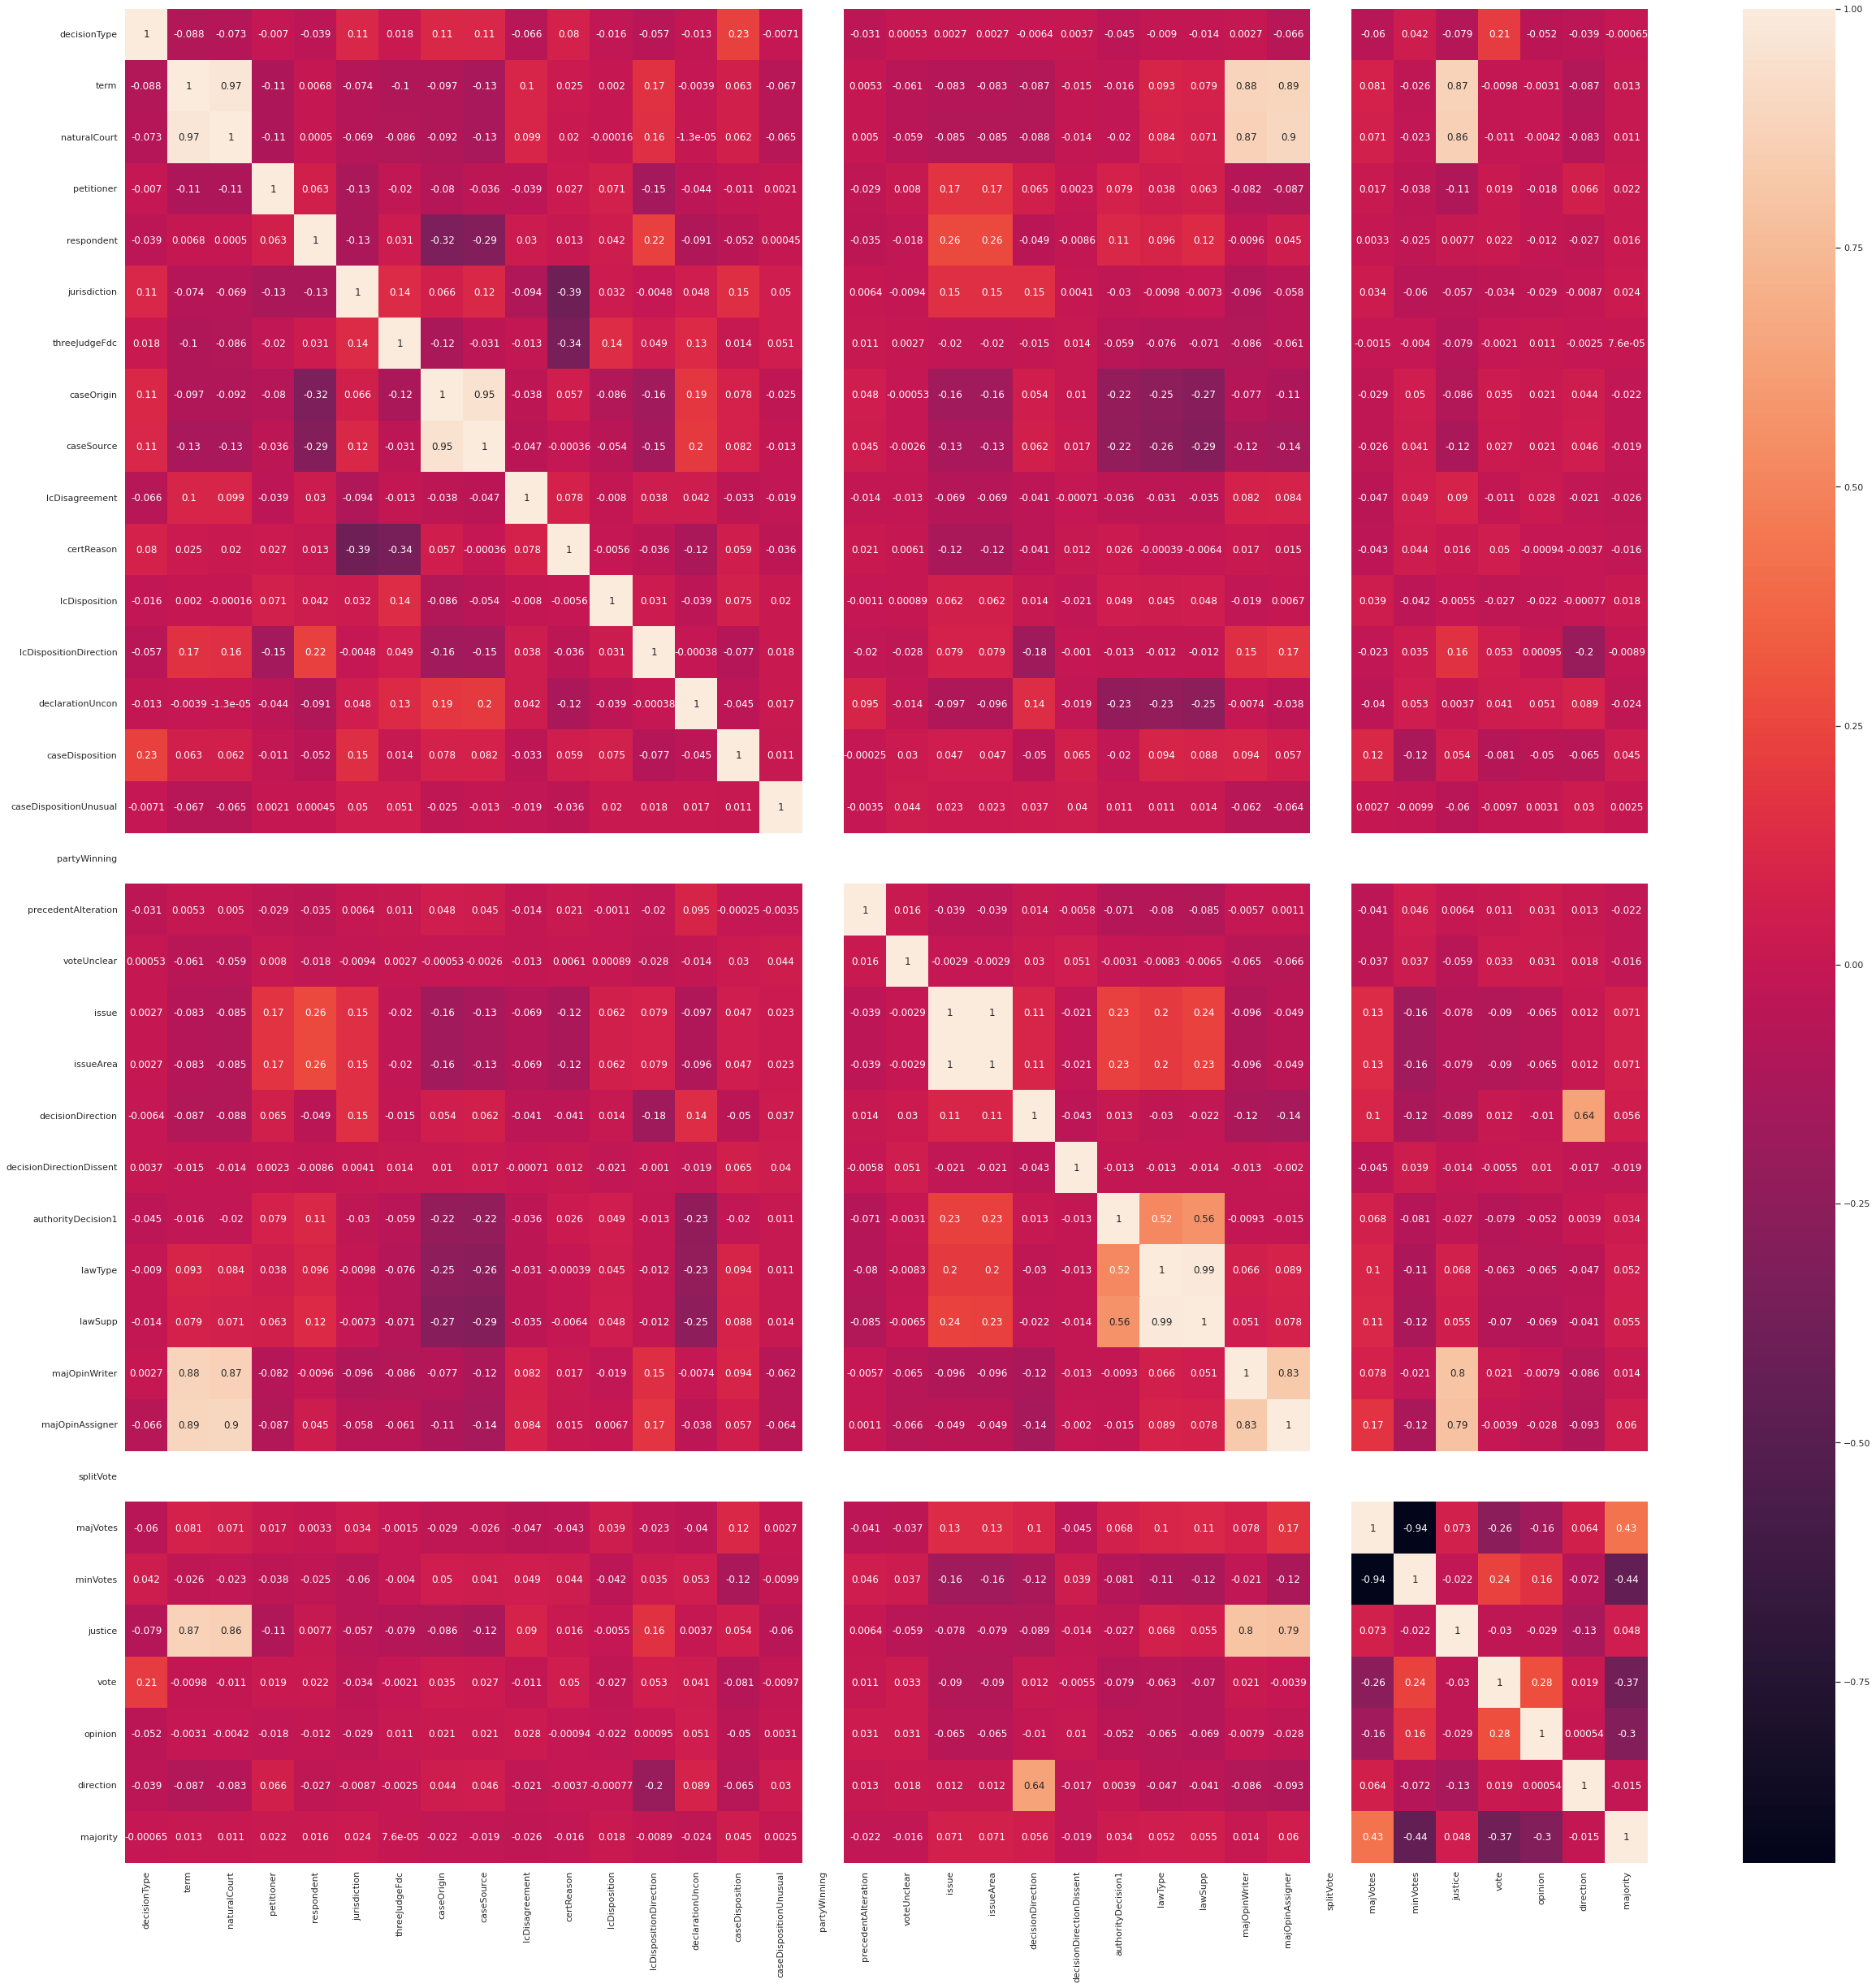

In [183]:
plt.figure(figsize=(42,42))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.plot(x=df.index.name, kind='box', figsize=(75,10))

In [ ]:
#Feature Selection Methods: 
# 1.Univariate Selection
# 2.Feature Importance
# 3.Correlation Matrix with Heatmap (Already Implemented above)


In [ ]:
shape = df.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])

In [ ]:
df.dtypes

In [ ]:
def dt_inplace(df):
    """Automatically detect and convert (in place!) each
    dataframe column of datatype 'object' to a datetime just
    when ALL of its non-NaN values can be successfully parsed
    by pd.to_datetime().  Also returns a ref. to df for
    convenient use in an expression.
    """
    from pandas.errors import ParserError
    for c in df.columns[df.dtypes=='object']: #don't cnvt num
        try:
            df[c]=pd.to_datetime(df[c])
        except (ParserError,ValueError): #Can't cnvrt some
            pass # ...so leave whole column as-is unconverted
    return df
def read_csv(*args, **kwargs):
    """Drop-in replacement for Pandas pd.read_csv. It invokes
    pd.read_csv() (passing its arguments) and then auto-
    matically detects and converts each column whose datatype
    is 'object' to a datetime just when ALL of the column's
    non-NaN values can be successfully parsed by
    pd.to_datetime(), and returns the resulting dataframe.
    """
    return dt_inplace(pd.read_csv(*args, **kwargs))

In [ ]:
cols = df.select_dtypes(exclude=['float']).columns
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [ ]:
df.dtypes

In [ ]:
#Variance Threshold 

In [ ]:
# It will zero variance features
from dataclasses import dataclass
from sklearn.feature_selection import VarianceThreshold
varthres = VarianceThreshold(threshold=0)
varthres.fit(df)


In [ ]:
#This will tell us which columns are zero variance, True value indidcates Non-zero variance column, False value indicates Zero Variance Columns
varthres.get_support()

In [ ]:
df.columns[varthres.get_support()]

In [ ]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[varthres.get_support()]]

print(len(constant_columns))

In [ ]:
# These columns can be dropped
for feature in constant_columns:
  print(feature)

In [ ]:
df.drop(constant_columns,axis=1)

In [ ]:
#feature selection using Pearson correlation 

In [ ]:
# the partyWinning label need to be changed to 0 and 1 using numpy’s where function
label="partyWinning"
features = df.columns.tolist()
features.remove(label)

#change party winning labelling to 0 and 1
df[label] = np.where( df[label] > 1,1,0)

In [ ]:
# evaluation of function (merit), which gets the subset and label name as inputs

In [ ]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [ ]:
subset = ['decisionType', 'term', 'naturalCourt', 'petitioner']
corr = df[subset].corr()
corr

In [ ]:
# Now mask the redundant values

In [ ]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

In [ ]:
# unstack the absolute values and take their mean.

In [ ]:
label_df = df["partyWinning"]


In [ ]:
#initialize a priority queue and push our first subset containing just one feature
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)


In [ ]:
#Dropping the columns suggested by variance threshold method
df1 = df.drop(['caseId','docketId','caseIssuesId','voteId','dateDecision','usCite','sctCite','ledCite','lexisCite','chief','caseName','dateArgument','dateRearg','lawMinor','splitVote','justiceName'], axis=1)

In [ ]:
df1


In [ ]:
#Heatmap for updated dataset with dropped columns
plt.figure(figsize=(42,42))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
 #creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.
 cor_matrix = df1.corr().abs()

In [ ]:
#Printing cor_matrix
cor_matrix

In [ ]:
 #Selecting the Upper Triangle Matrix
 upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [ ]:
upper_tri

In [ ]:
#selecting the columns which are having absolute correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [ ]:
print(to_drop)

In [ ]:
df2 = df1.drop(['naturalCourt', 'adminActionState', 'caseOriginState', 'caseSource', 'caseSourceState', 'issueArea', 'lawSupp'], axis=1)

In [ ]:
df2

In [ ]:
#Removing the Columns which contain 90 Percent NAN values
perc = 75
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df3 = df2.dropna( axis=1, 
                thresh=min_count) 

In [ ]:
df3

In [ ]:
df3.describe()


In [ ]:
#Correlation of Categorical Variables

In [ ]:
pearsoncorr = df3.corr(method='pearson')
pearsoncorr

In [ ]:
plt.figure(figsize=(42,42))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [ ]:
df4 = df3.apply (pd.to_numeric, errors='coerce')

In [ ]:
df4 = df3.dropna()

print (df4)

In [ ]:
df4


In [ ]:
#Encoding deals with the Categorical variables
#Types of encoding: 
#1. Nominal: dont worry about the rank of the data in the dataset
#2. Ordinal: work about the ranks of the data in the dataset


In [ ]:
pip install category_encoders 

In [ ]:
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df4['partyWinning'].unique()

In [ ]:
df4['partyWinning'].value_counts()

In [ ]:
df4.columns

In [ ]:
Q1 = df4.quantile(0.25)
Q3 = df4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
print((df4 < (Q1 - 1.5 * IQR)) |  (df4 > (Q3 + 1.5 * IQR)))

In [ ]:
lower_bound_val = (Q1 - (1.5 * IQR))
print(lower_bound_val)

In [ ]:
upper_bound_val = (Q3 + (1.5 * IQR))
print(upper_bound_val)

In [ ]:
df4.shape

In [ ]:
df4.head(10)

In [ ]:
df4.dropna(how='all')

In [ ]:
df4['partyWinning'] = pd.to_numeric(df4['partyWinning'], downcast='float')

In [ ]:
df4.dtypes


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode_df = pd.DataFrame(mod_df, columns=['partyWinning'])
labelencoder = LabelEncoder()
encode_df['encode_Types_Cat'] = labelencoder.fit_transform(encode_df['partyWinning'])
encode_df

In [ ]:
mod_df['partyWinning'].unique()

In [ ]:
mod_df['partyWinning'].value_counts()

In [ ]:
df4['partyWinning'].value_counts()